<a href="https://colab.research.google.com/github/miguel-fc/Malaria-DL/blob/main/m1_Malaria_Project_Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Image Processing
#@markdown This is a tool to resize images and convert them into grayscale and 16bit.
#@markdown Please set the operations you want to perform in your images and press the play button in the left.

import numpy as np
from google.colab import files
from PIL import Image

resize = True #@param {type:"boolean"}
resize_width = 512 #@param {type:"integer"}
resize_height = 512 #@param {type:"integer"}
grayscale = False #@param {type:"boolean"}
to_16_bit = False #@param {type:"boolean"}

print('''
Please upload as many images as you want to process (all at once).
Note that the images must be either .jpg or .png.
''')
original_images = files.upload()

for filename in original_images.keys():
  print(f'Processing {filename}')

  if filename.split('.')[1] in ['jpg', 'png']:
    image = Image.open(filename)
    new_filename_end = ''

    if resize:
      image = image.resize((resize_width, resize_height))
      new_filename_end += f'_{resize_width}x{resize_height}'

    if grayscale:
      image = image.convert('L')
      new_filename_end += '_bw'

    if to_16_bit:
      image_array = np.asarray(image, dtype=np.uint16) 
      image_array = 
      image_array *= 256
      image = Image.fromarray(image_array)
      new_filename_end += '_16b'

    if resize or grayscale or to_16_bit:
      new_filename = filename.split('.')[0] + new_filename_end + '.png'
      image_to_download = image.save(new_filename)

      print('Processing completed. Downloading...')
      files.download(new_filename)
  
  else:
    print('Unable to process file. File extension must be either .png or .jpg')


Please upload as many images as you want to process (all at once).
Note that the images must be either .jpg or .png.



Saving Pfalc 5.jpg to Pfalc 5 (1).jpg
Processing Pfalc 5.jpg
Processing completed. Downloading...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Import required packages
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
%matplotlib inline
import cv2
from google.colab.patches import cv2_imshow
import gdown
from skimage.measure import label, regionprops, regionprops_table
from google.colab import files
from PIL import Image

In [ ]:
pip install cellpose

     |████████████████████████████████| 168 kB 26.9 MB/s 
     |████████████████████████████████| 3.4 MB 56.9 MB/s 
     |████████████████████████████████| 47.8 MB 65.8 MB/s 


In [ ]:
from cellpose import models, utils,plot,io

In [ ]:
resize_image = files.upload()

Saving Pfalc 5_512x512.png to Pfalc 5_512x512 (1).png


In [ ]:
for filename in resize_image.keys():
  print(f'Processing {filename}')

  if filename.split('.')[1] in ['jpg', 'png']:
    image = Image.open(filename)

Processing Pfalc 5_512x512.png


In [ ]:
img_arr = np.asarray(image)

In [ ]:
img_arr.shape, img_arr.max(), img_arr.min()

((512, 512, 3), 248, 3)

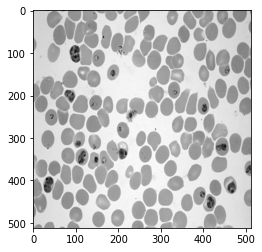

In [ ]:
plt.imshow(img_arr[:,:,1],cmap='gray')

In [ ]:
img_arr[:,:,1].max(), img_arr[:,:,1].min()

(248, 24)

In [ ]:
pepe = img_arr[:,:,1]

In [ ]:
pepe.shape

(512, 512)

In [ ]:
img_bw = (pepe - pepe.min())/(pepe.max() - pepe.min())

In [ ]:
img_bw.max(), img_bw.min()

(1.0, 0.0)

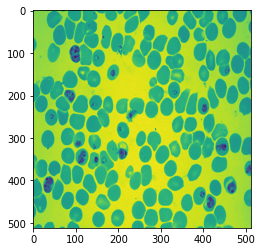

In [ ]:
plt.imshow(img_bw)

In [ ]:
len(resize_image)

1

In [ ]:
img_arr_b = img_arr[:,:,0:2]

In [ ]:
img_arr_b.shape

(512, 512, 2)

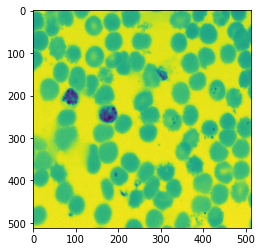

In [ ]:
plt.imshow(img_arr_b[...,0])

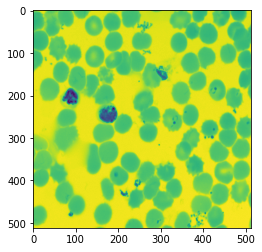

In [ ]:
plt.imshow(img_arr_b[...,1])

In [ ]:
model = models.Cellpose(gpu=True, model_type="cyto")

100%|██████████| 25.3M/25.3M [00:03<00:00, 8.11MB/s]
100%|██████████| 5.23k/5.23k [00:00<00:00, 5.00MB/s]


In [ ]:
masks, flows, styles, diams = model.eval(img_bw, diameter=40, channels=[0,0])

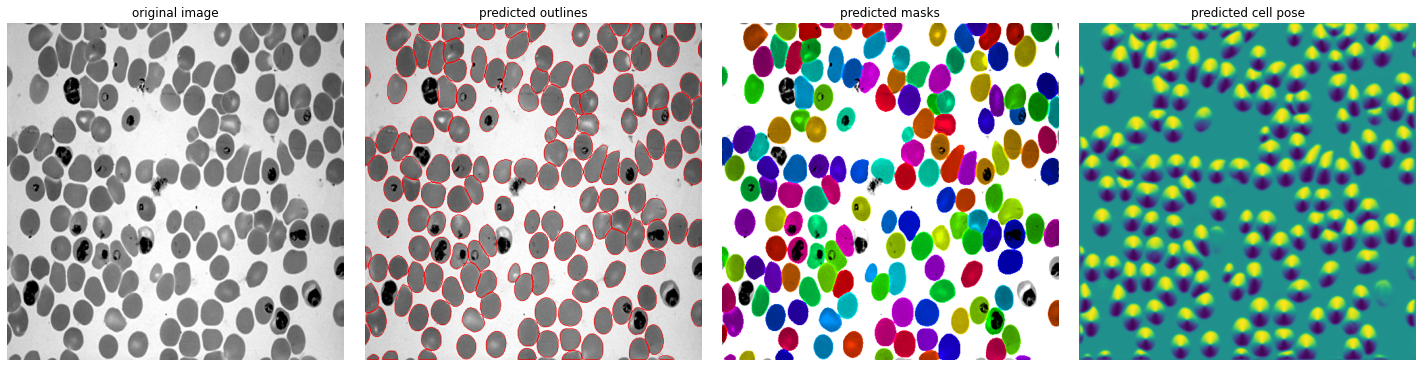

In [ ]:
fig = plt.figure(figsize=(20,5))
plot.show_segmentation(fig, img_bw, masks, flows[1][0])
plt.tight_layout()
plt.show()

In [ ]:
masks.shape, masks.max(), masks.min()

((512, 512), 93, 0)

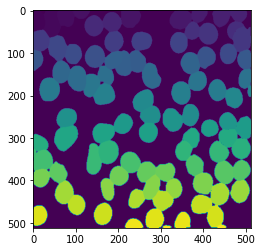

In [ ]:
plt.imshow(masks)

In [ ]:
model_n = models.Cellpose(gpu=True, model_type="nuclei")

100%|██████████| 25.3M/25.3M [00:03<00:00, 8.12MB/s]
100%|██████████| 3.54k/3.54k [00:00<00:00, 12.7MB/s]


In [ ]:
masks_n, flows_n, styles, diams = model_n.eval(img_bw, diameter=8, channels=[0,0])

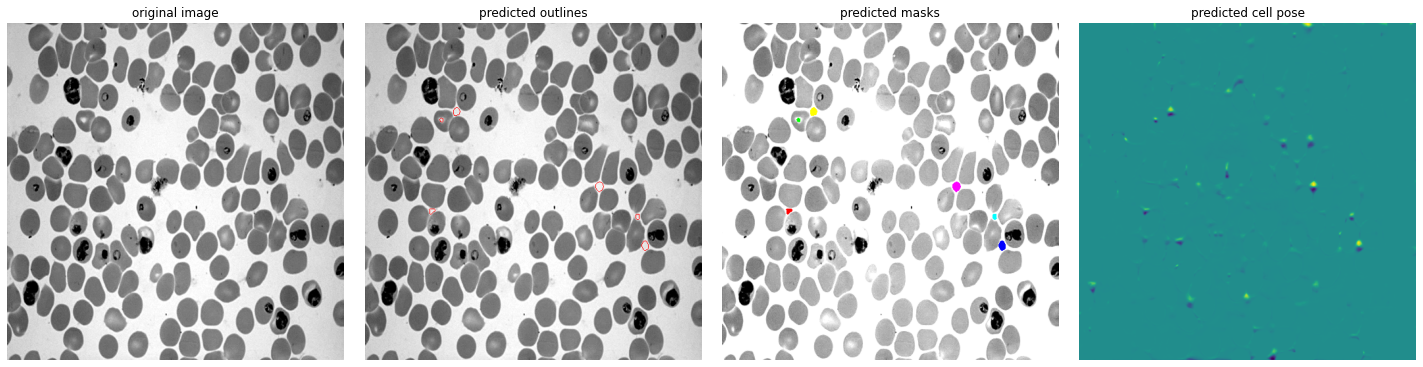

In [ ]:
fig = plt.figure(figsize=(20,5))
plot.show_segmentation(fig, img_bw, masks_n, flows_n[1][0])
plt.tight_layout()
plt.show()

In [ ]:
overlay = plot.mask_overlay(img_arr_b, masks)

NameError: ignored

In [ ]:
pepe= plot.outline_view(img_arr_b,masks)

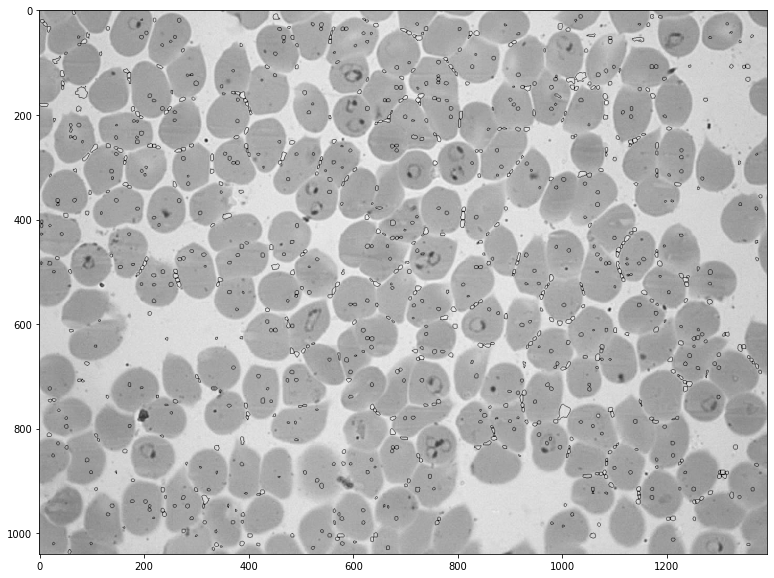

In [ ]:
fig = plt.figure(figsize=(20,10))
plt.imshow(pepe)

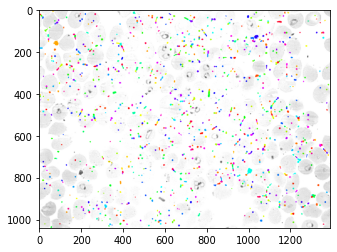

In [ ]:
plt.imshow(overlay,cmap='gray')

In [ ]:
# Some helper functions to cut windows of the same size and containing only invididual organelles.
def make_square(img,box_size):
  y = (box_size - img.shape[0])
  if y == 0:
    print("Warning, increase window_size")
  if y%2==0:
    y1=y2=y/2
  else:
    y1 = np.ceil(y/2)
    y2 = y - y1
  x = (box_size - img.shape[1])
  if x == 0:
    print("Warning, increase window_size")
  if x%2==0:
    x1=x2=x/2
  else:
    x1 = np.ceil(x/2)
    x2 = x - x1
  return np.pad(img,((int(y1),int(y2)),(int(x1),int(x2))),mode='constant',constant_values=0)

def mask2stack(ccm_mask,window_size=700):
  labelled_image = label(ccm_mask)
  feature_table = regionprops(labelled_image)
  # for sample in feature_table:
  #   # if sample.filled_image.shape[0] != 1:
  #   #   print("Hola")
  subimgs = []
  for sample in feature_table:
    # print(sample.filled_image.shape)
    # pepe = int(sample.filled_image.shape)
    # if pepe == 1:
    #   print('Hola')
    subimgs.append(make_square(np.ones(sample.filled_image.shape) * sample.filled_image,window_size))
  # print(len(subimgs))
  return np.stack(subimgs,axis=0)

In [ ]:
masks.shape, overlay.shape, pepe.shape, pepe[...,0].shape

((1040, 1392), (1040, 1392, 3), (1040, 1392, 3), (1040, 1392))

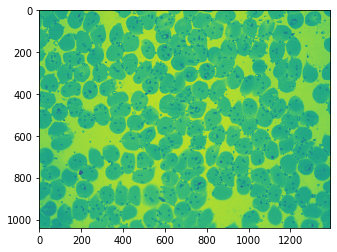

In [ ]:
plt.imshow(pepe[...,2])

In [ ]:
array_gfp_masks = []
array_gfp_masks.append(overlay[...,0])
# array_gfp_masks. = masks
# print(array_gfp_masks.shape)
# n = len(array_gfp_masks[:,0,0])
# print(n)
n=1
carboxysome_stack = []

for i in range(n):
  carboxysome_stack.append(mask2stack(array_gfp_masks[i]))

subimg_1 = np.vstack(carboxysome_stack[i] for i in range(n))
# print(subimg_1.shape)

NameError: ignored

In [ ]:
subimg_1.shape

(1824, 700, 700)

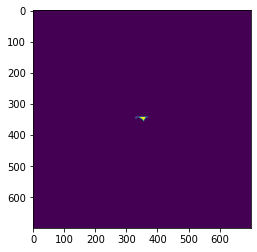

In [ ]:
plt.imshow(subimg_1[0])